In [7]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [28]:
#Leemos el CSV
nlp = pd.read_csv('data/train.csv')

In [29]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [30]:
nlp['legth_tweet'] = nlp['text'].str.len()

In [31]:
nlp.head(10)

,id,keyword,location,text,target,legth_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


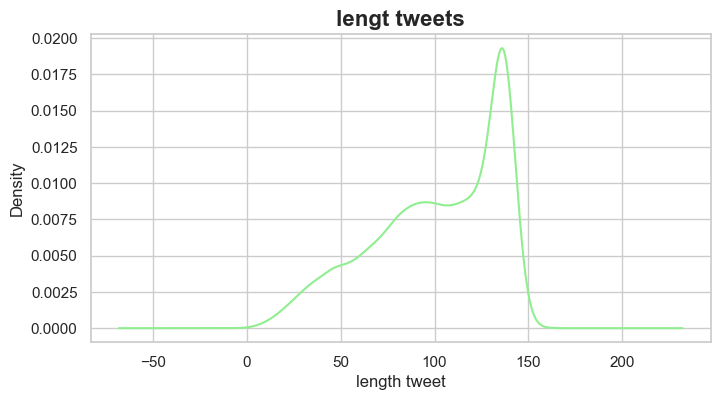

In [58]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('lengt tweets',fontsize=16,fontweight='bold')
ax.set_xlabel('length tweet')
nlp['sizetweet'].plot.kde(color='lightgreen', figsize=(8, 4))
plt.show()

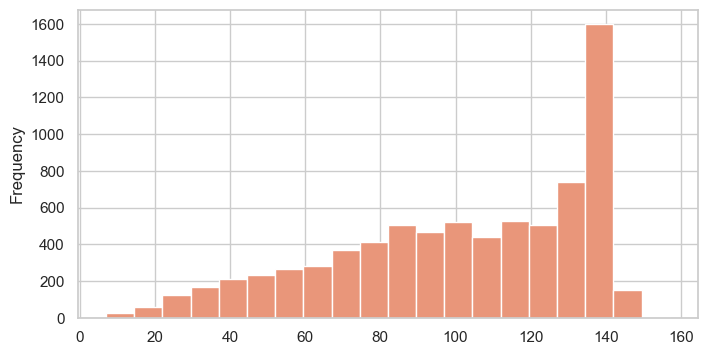

In [59]:
fig=plt.figure()
ax = fig.add_subplot(111)

#plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
#ax.set_xlabel('year of award')
nlp['sizetweet'].plot.hist(color='darksalmon', figsize=(8, 4), bins=20)

plt.show()

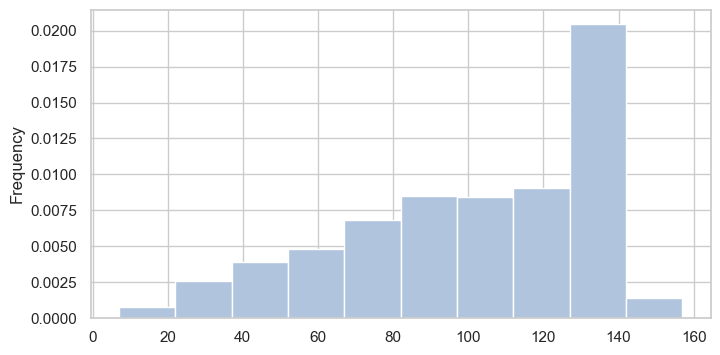

In [60]:
nlp['sizetweet'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
nlp['sizetweet'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

plt.show()

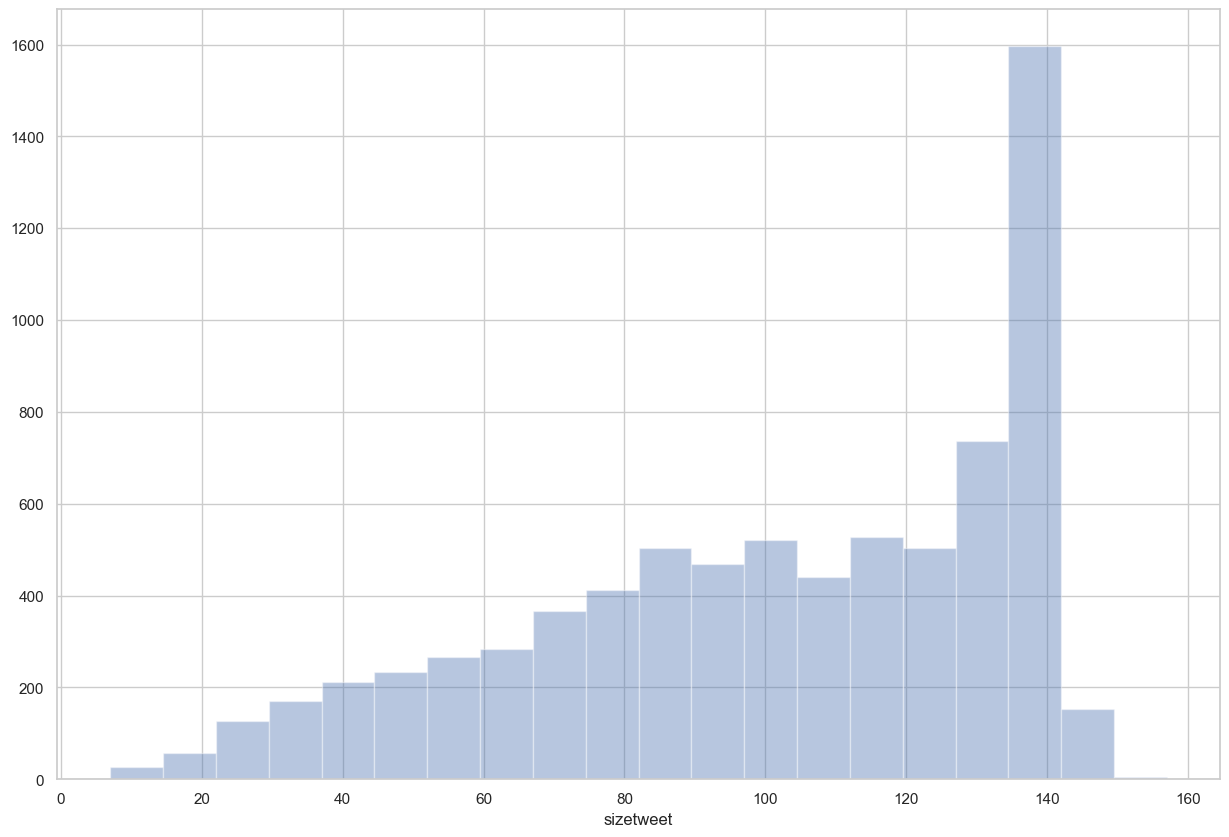

In [61]:
sns.distplot(nlp['sizetweet'], kde=False, bins=20)


In [108]:
nlp['promedio'] = nlp['sizetweet'].mean()
nlp['masquepromedio'] = nlp['promedio']>nlp['sizetweet']
masqueprom['Verd'] = nlp[nlp['masquepromedio']==True].masquepromedio.count()
masqueprom['False'] = nlp[nlp['masquepromedio']==False].masquepromedio.count()
sizes = [masqueprom['False'], masqueprom['Verd']]
sizes

[4141, 3472]

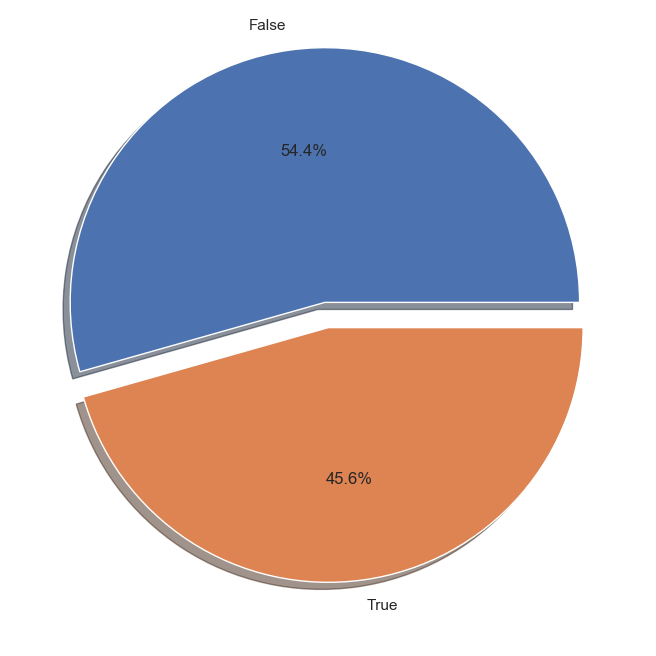

In [110]:
#plot = df.plot.pie(y='mass', figsize=(5, 5))
#masqueprom.plot.pie(figsize=(8, 4))
plt.figure(figsize=(11.7, 8.27))
plt.pie(sizes, labels = ('False', 'True'), autopct='%1.1f%%', shadow=True, startangle=0, explode=(0.1, 0))
plt.show()

In [32]:
grouped = nlp.groupby(['legth_tweet','target'])[['id']].count().reset_index()
grouped.rename(columns={'id':'cant_veces'}, inplace=True)

In [33]:
grouped.head(15)

,legth_tweet,target,cant_veces
0,7,0,3
1,8,0,4
2,9,0,2
3,10,0,2
4,11,0,4
5,12,0,4
6,13,0,3
7,14,0,4
8,14,1,1
9,15,0,3


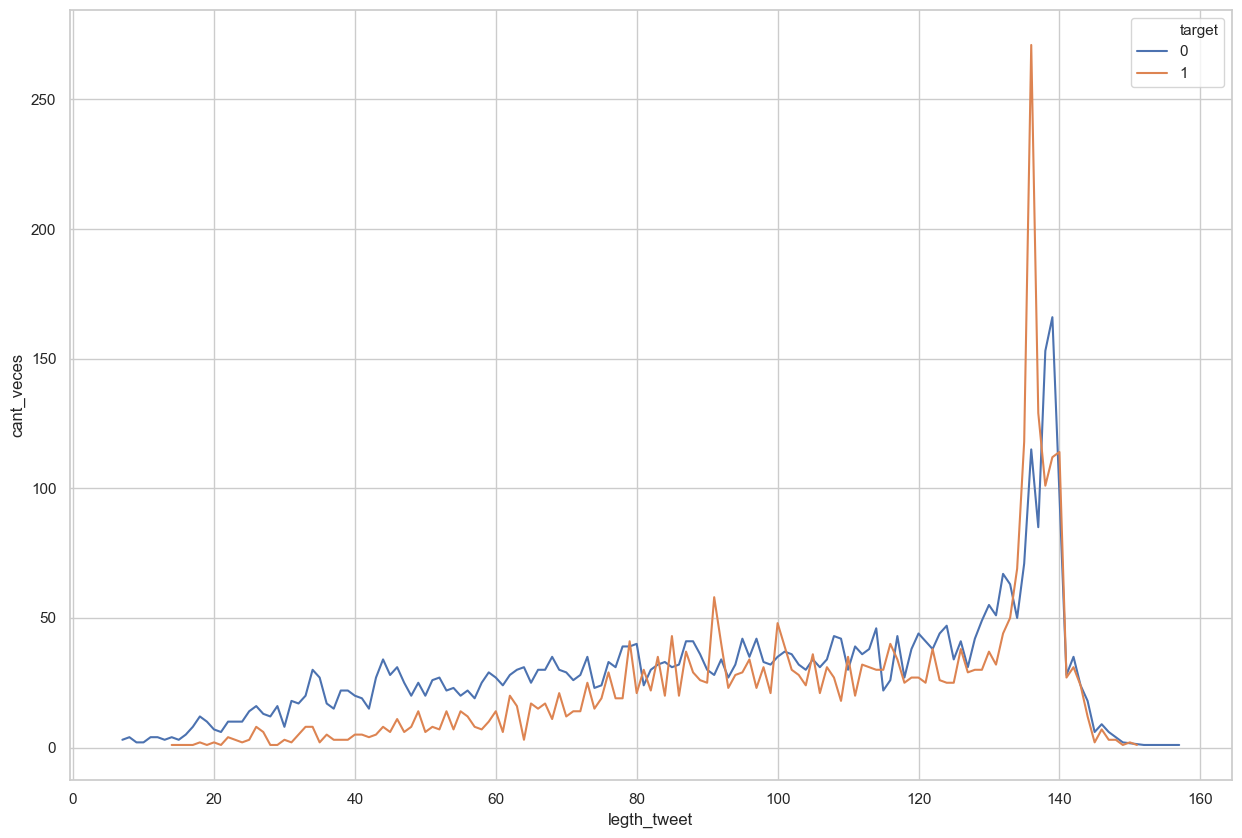

In [34]:
sns.lineplot(x="legth_tweet", y="cant_veces",hue="target",data=grouped)

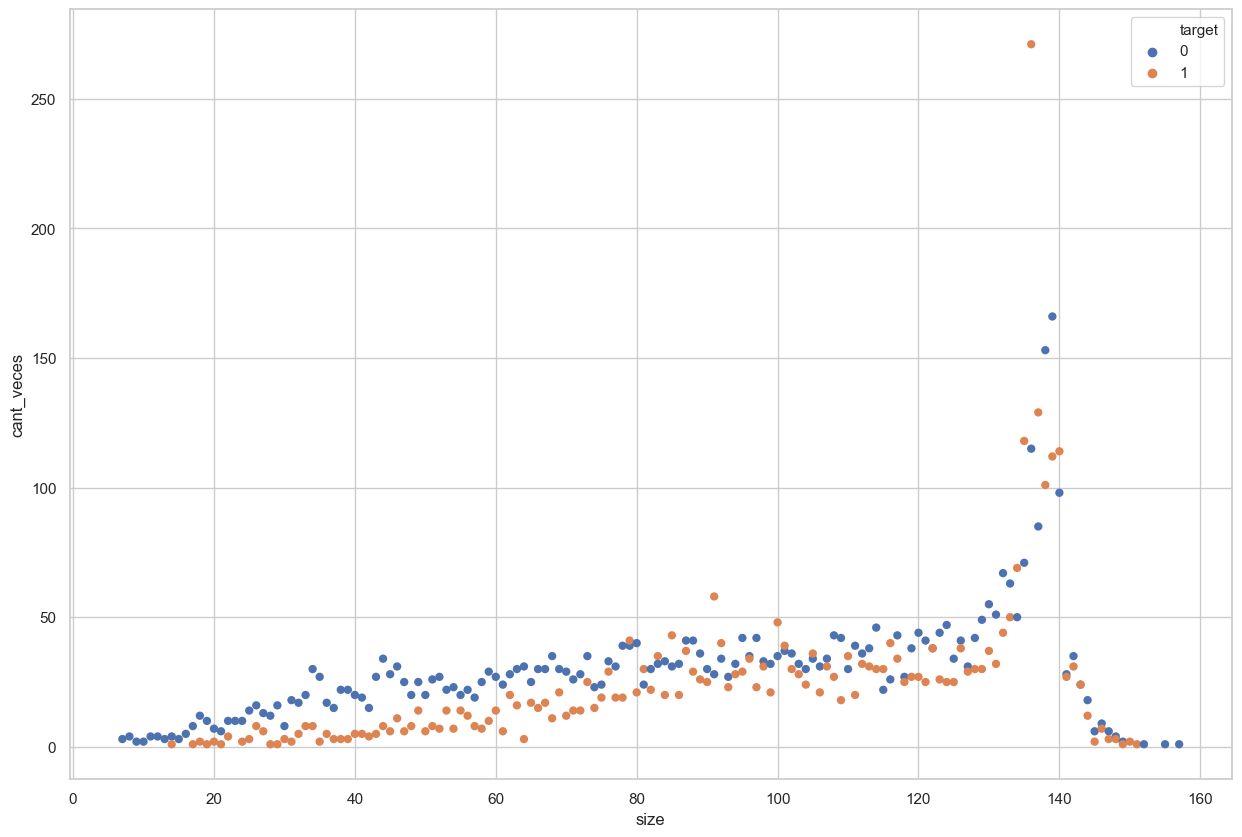

In [27]:
sns.scatterplot(x="legth_tweet", y="cant_veces", hue="target", sizes=(1, 8), linewidth=0, data=grouped)